In [1]:
import h5py
import fitsio
import healsparse as hsp
import skyproj
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hmap = hsp.HealSparseMap.read("jointmask_DESY6_2024-06-04.hsp")

tomo bin: 4
object ind: 879845


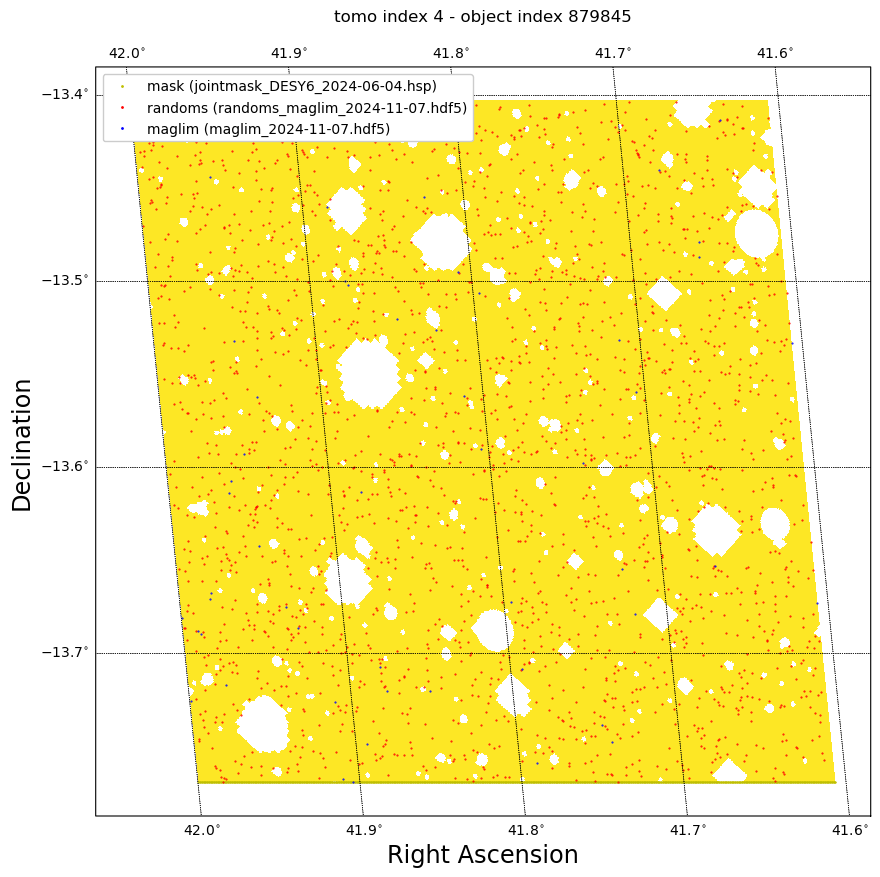

In [6]:
rng = np.random.default_rng()
dra = 0.2
ddec = 0.2
bind = rng.choice(6)
print("tomo bin:", bind)

with h5py.File("maglim_2024-11-07.hdf5") as fp:
    ind = rng.choice(fp[f'tomo_bin_{bind}']['RA'].shape[0])
    print("object ind:", ind)
    ra = fp[f'tomo_bin_{bind}']['RA'][:]
    dec = fp[f'tomo_bin_{bind}']['DEC'][:]
    msk = (
        (np.abs(ra - ra[ind]) < dra)
        & (np.abs(dec - dec[ind]) < ddec)
    )

    ra = ra[msk]
    dec = dec[msk]

dec_range=(dec.min(), dec.max())
ra_range=(ra.min(), ra.max())
with h5py.File("randoms_maglim_2024-11-07.hdf5") as fp:
    rra = fp[f'tomo_bin_{bind}']['ra'][:]
    msk = (
        (rra >= ra_range[0])
        & (rra <= ra_range[1])
    )
    rra = rra[msk]
    rdec = fp[f'tomo_bin_{bind}']['dec'][msk]
    msk = (
        (rdec >= dec_range[0])
        & (rdec <= dec_range[1])
    )
    rra = rra[msk]
    rdec = rdec[msk]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax = axs

sp = skyproj.McBrydeSkyproj(ax=ax)
mim, mra, mdec, mval = sp.draw_hspmap(
    hmap,
    lat_range=dec_range,
    lon_range=ra_range,
    zoom=True,

)

sp.ax.plot(mra[0], mdec[0], ".", color="y", ms=1, label="mask (jointmask_DESY6_2024-06-04.hsp)")
sp.ax.plot(rra, rdec, '.', color='r', ms=1, label="randoms (randoms_maglim_2024-11-07.hdf5)")
sp.ax.plot(ra, dec, '.', color='b', ms=1, label="maglim (maglim_2024-11-07.hdf5)")

sp.legend(loc="upper left", framealpha=1, markerscale=2)
sp.ax.set_title(f"tomo index {bind} - object index {ind}", y=1.05);

In [4]:
with h5py.File("metadetect_2024-11-07.hdf5") as fp:
    for key in fp.keys():
        for tkey in fp[key].keys():
            print("mdet|tomo:", key, tkey, flush=True)
            flags = fp[key][tkey]['mdet_flags'][:]
            mra = fp[key][tkey]['ra'][:]
            mdec = fp[key][tkey]['dec'][:]
            assert np.array_equal(np.unique(flags), [0])
            assert np.all(hmap.get_values_pos(mra, mdec))
            del mra
            del mdec
            del flags

mdet|tomo: 1m tomo_bin_0
mdet|tomo: 1m tomo_bin_1
mdet|tomo: 1m tomo_bin_2
mdet|tomo: 1m tomo_bin_3
mdet|tomo: 1p tomo_bin_0
mdet|tomo: 1p tomo_bin_1
mdet|tomo: 1p tomo_bin_2
mdet|tomo: 1p tomo_bin_3
mdet|tomo: 2m tomo_bin_0
mdet|tomo: 2m tomo_bin_1
mdet|tomo: 2m tomo_bin_2
mdet|tomo: 2m tomo_bin_3
mdet|tomo: 2p tomo_bin_0
mdet|tomo: 2p tomo_bin_1
mdet|tomo: 2p tomo_bin_2
mdet|tomo: 2p tomo_bin_3
mdet|tomo: noshear tomo_bin_0
mdet|tomo: noshear tomo_bin_1
mdet|tomo: noshear tomo_bin_2
mdet|tomo: noshear tomo_bin_3
